In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [132]:
Data= pd.read_csv(r'C:\Users\yo-un\Desktop\EXPORTED DATAFRAME\End-to End Project\EarthDay 2022 Tweets\Earth day Tweets.csv')

In [133]:
Data.columns
Data.head(10)
Data.isnull().sum()


text                0
hash_tags       37156
account_tags    23147
emoji_lists     61791
sentiment           0
emotion             0
dtype: int64

In [134]:
Data[Data['hash_tags'].isnull()]

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
0,RT @POTUS: As we celebrate the progress we’ve ...,NaN,POTUS,NaN,POSITIVE,optimism
9,RT @StrikePac: Democrats Deliver on the Enviro...,NaN,StrikePac,"['🌏', '☀', '🚙', '🚰', '🚆', '💵', '🚌', '🏭', '🏡', ...",NEGATIVE,optimism
10,RT @zomato: We don't have a post for Earth Day...,NaN,zomato,NaN,NEGATIVE,optimism
11,I thrive on earth day,NaN,NaN,NaN,POSITIVE,joy
16,RT @CryptoGrizman: HAPPY EARTH DAY 🌍\n\nRecent...,NaN,CryptoGrizman,"['🌍', '🤞']",NEGATIVE,joy
...,...,...,...,...,...,...
100086,RT @RealMacReport: Joe Biden arrives at Green ...,NaN,RealMacReport,NaN,POSITIVE,joy
100092,RT @PlayStation: Happy Earth Day from the Forb...,NaN,PlayStation,['🌎'],POSITIVE,joy
100096,RT @latestinspace: Happy Earth Day! These imag...,NaN,latestinspace,NaN,POSITIVE,joy
100097,Happy earth day I work between two constructio...,NaN,NaN,NaN,NEGATIVE,sadness


In [135]:
Data.info()
Data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100099 entries, 0 to 100098
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          100099 non-null  object
 1   hash_tags     62943 non-null   object
 2   account_tags  76952 non-null   object
 3   emoji_lists   38308 non-null   object
 4   sentiment     100099 non-null  object
 5   emotion       100099 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
count,100099,62943,76952,38308,100099,100099
unique,50183,15123,23596,6677,2,4
top,RT @BarackObama: When it comes to climate chan...,EarthDay,cpsavesoil,['🌎'],POSITIVE,joy
freq,655,19566,3261,7466,66089,56309


In [136]:
Data[Data['hash_tags'].duplicated()]

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion
3,RT @CapsCoalition: Biden Signs Executive Order...,EarthDay,CapsCoalition,NaN,POSITIVE,optimism
6,"RT @mfnerc: Earth Day, celebrated on April 22,...",EarthDay,mfnerc,NaN,POSITIVE,optimism
9,RT @StrikePac: Democrats Deliver on the Enviro...,NaN,StrikePac,"['🌏', '☀', '🚙', '🚰', '🚆', '💵', '🚌', '🏭', '🏡', ...",NEGATIVE,optimism
10,RT @zomato: We don't have a post for Earth Day...,NaN,zomato,NaN,NEGATIVE,optimism
11,I thrive on earth day,NaN,NaN,NaN,POSITIVE,joy
...,...,...,...,...,...,...
100094,Did you know? The Canadian Coalition on Acid R...,EarthDay,NaN,NaN,NEGATIVE,optimism
100095,"Today, EERE celebrates #EarthDay by making sev...","EarthDay,InvestInOurPlanet",NaN,NaN,POSITIVE,optimism
100096,RT @latestinspace: Happy Earth Day! These imag...,NaN,latestinspace,NaN,POSITIVE,joy
100097,Happy earth day I work between two constructio...,NaN,NaN,NaN,NEGATIVE,sadness


In [137]:
Data.drop_duplicates(ignore_index=False,inplace=True)

In [138]:
Data['text'].value_counts().sum()

50183

In [35]:
def clean_text(text):
    ''' This Function takes in text to remove urls and website links and account tags if any'''
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)
    tag_pattern = r'(RT @([A-Za-z0-9_]+):)|(@([A-Za-z0-9_]+))' # Removes the RT @account tag: pattern as well
    text = re.sub(tag_pattern, '', text)
    return text

In [151]:
Data['text_cleaned'] = Data['text'].apply(clean_text)

In [152]:
Data.head()

,text,hash_tags,account_tags,emoji_lists,sentiment,emotion,text_cleaned
0,RT @POTUS: As we celebrate the progress we’ve ...,NaN,POTUS,NaN,POSITIVE,optimism,As we celebrate the progress we’ve made this ...
1,"This #EarthDay, I'm happy to be meeting with P...","EarthDay,GetTheLeadOut",PennEnvironment,NaN,POSITIVE,optimism,"This #EarthDay, I'm happy to be meeting with P..."
2,RT @Khan__sir_patna: All of people wishes and ...,EarthDay,Khan__sir_patna,NaN,POSITIVE,joy,All of people wishes and happy earth day #Ear...
3,RT @CapsCoalition: Biden Signs Executive Order...,EarthDay,CapsCoalition,NaN,POSITIVE,optimism,Biden Signs Executive Order on Natural Capita...
4,RT @tamannaahspeaks: Animals source their food...,MyconnectwithSoil,"tamannaahspeaks,SadhguruJV,cpsavesoil",NaN,POSITIVE,optimism,Animals source their food from soil but our s...


In [153]:
Data['text_cleaned']=Data['text_cleaned'].str.replace('#EarthDay','EarthDay')

# Sentiment Analysis

In [141]:
Sentiment = dict(Data.sentiment.value_counts())
Sentiment


{'POSITIVE': 35402, 'NEGATIVE': 14781}

In [142]:
X=Sentiment.keys()
X
Y=Sentiment.values()
Y

dict_values([35402, 14781])

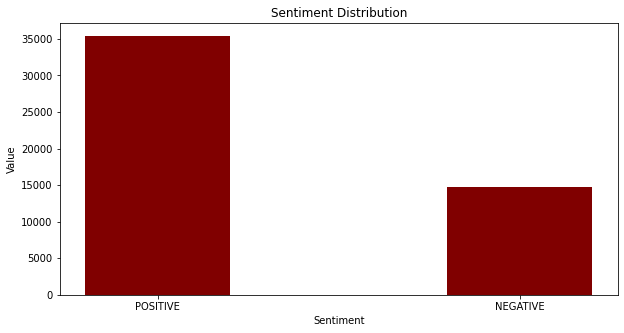

In [143]:
from matplotlib.pyplot import title


fig=plt.figure(figsize = (10, 5))
plt.bar(X, Y, color ='maroon',
        width = 0.4)
plt.title('Sentiment Distribution')
plt.xticks()
plt.yticks()
plt.xlabel('Sentiment')
plt.ylabel('Value')
plt.show()

In [76]:
fig1 = px.histogram(Data,
x="sentiment",
template='plotly_white',
color="sentiment")

fig1.update_layout(
title={
'text': "Emotion Count",
'x' : 0.5,
'xanchor': 'center'
    })
fig1


# Sentiment and Emotion Anaysis


In [144]:
Grouped=Data.groupby(['emotion', 'sentiment']).count()['text'].reset_index()

In [89]:
Fig = px.bar(Grouped,
              x="text",
              y="emotion",
              template='plotly_white',
              color_discrete_sequence=['#EF553B', '#636EFA'],
              color="sentiment",
              opacity=0.7)
Fig.update_layout(title={
    'text': "Sentiment Distribution per Emotion",
    'x': 0.5,
    'xanchor': 'center'
})

# Keyword Analysis

In [145]:
keyword=Data['hash_tags'].value_counts().sort_values(ascending=False)
keyword.head(20)

EarthDay                               8880
earthday                                898
EarthDay2022                            642
EarthDay,EarthDay2022                   348
EarthDay,InvestInOurPlanet              281
EarthDay22                              181
attexploresweeps                        131
MyConnectWithSoil                       126
SeedBolts                               108
InvestInOurPlanet                       104
Earthday                                101
EarthDay2022,EarthDay                    96
EarthDay,EarthDay22                      84
SaveSoil,EarthDay,MyConnectWithSoil      68
InvestInOurPlanet,EarthDay               59
EarthDay,SaveSoil,MyConnectWithSoil      56
EarthDay2022,InvestInOurPlanet           54
earthday2022                             52
EarthDay,sustainability                  47
EarthDay,EarthDay                        41
Name: hash_tags, dtype: int64

In [146]:
Data.isnull().sum()

text                0
hash_tags       17868
account_tags    22877
emoji_lists     30233
sentiment           0
emotion             0
dtype: int64

In [148]:
Data[['account_tags']] = Data[['account_tags']].fillna('Uknown')



In [166]:
Data.dropna(inplace=True)


In [168]:
Data.drop(columns=('emoji_lists'),inplace=True)

In [171]:
Data.head(20)
Data.shape

(13017, 6)

In [172]:
Data.head(10)

,text,hash_tags,account_tags,sentiment,emotion,text_cleaned
13,RT @ZLabe: ➡️ Create your own climate change s...,"EarthDay,Arctic",ZLabe,NEGATIVE,joy,➡️ Create your own climate change stripes for...
14,"RT @LMMontgomeryLS: Oh, I don’t mean just the ...",EarthDay,LMMontgomeryLS,POSITIVE,joy,"Oh, I don’t mean just the tree; of course it’..."
25,Are you ready to take eco-matters into your ow...,"EarthDay,BiodiversityDay,Connect2Earth,EarthDa...",Uknown,POSITIVE,optimism,Are you ready to take eco-matters into your ow...
30,RT @OutrageOptimism: The path ahead will be fu...,EarthDay,OutrageOptimism,POSITIVE,optimism,The path ahead will be full of outrage and op...
46,RT @nftjakey: 🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes:...,"ad,solana,NFTGiveaway","nftjakey,nftjakey,ZombieTurtleNFT",NEGATIVE,joy,🌎EARTH DAY GIVEAWAY!🌎\n\nPrizes: \n🏆1 $SOL ($...
47,RT @uLethbridgeORIS: Happy Earth Day 🌱\n\n#Ear...,"EarthDay,enviornment,GreenEnergy,EarthDay2022",uLethbridgeORIS,POSITIVE,joy,Happy Earth Day 🌱\n\nEarthDay #enviornment #...
51,"RT @UCAR_News: This #EarthDay, we're proud to ...",EarthDay,"UCAR_News,UCARSciEd,COMETMetEd,GLOBEProgram,NC...",POSITIVE,joy,"This EarthDay, we're proud to provide local &..."
53,RT @EAPhotoCollect: Today EARTH DAY! \n\nOne ...,"NFTCleanUpDay,oceancleanup","EAPhotoCollect,Netheryonder,cryptovoxels,Pro2T...",NEGATIVE,joy,Today EARTH DAY! \n\nOne Earth Festival in ...
57,RT @CompassionEdin1: This #EarthDay take a sta...,EarthDay,"CompassionEdin1,DeborahMeaden,PeterEgan6,HughF...",NEGATIVE,optimism,This EarthDay take a stand. \n\nCall on the c...
59,Happy #EarthDay🌎! Coming off a historic state ...,"EarthDay,NY,NYActsonClimate",Uknown,POSITIVE,optimism,Happy EarthDay🌎! Coming off a historic state b...


In [184]:
_10_most_used_hashtag=Data['hash_tags'].value_counts().head(10)                                                      
_10_most_used_hashtag

EarthDay                      3452
earthday                       585
EarthDay2022                   276
EarthDay,EarthDay2022          141
EarthDay,InvestInOurPlanet     107
EarthDay22                      70
EarthDay2022,EarthDay           43
EarthDay,EarthDay22             35
Earthday                        34
InvestInOurPlanet               31
Name: hash_tags, dtype: int64

In [188]:
new_cols = ["text_cleaned","account_tags","hash_tags","sentiment","emotion","text"]
df=Data[new_cols]
df.drop(columns='text')
Data=df

In [193]:
Data.rename(columns={'text_cleaned':'Text','account_tags':'Account Tags','hash_tags':'Hashtags','sentiment':'Sentiment','emotion':'Emotions'},inplace=True)

In [195]:
Data.drop(columns='text',inplace=True)

In [199]:
Data.nunique()

Text            12569
Account Tags     7042
Hashtags         6390
Sentiment           2
Emotions            4
dtype: int64

In [198]:
Data.to_csv(r'C:\Users\yo-un\Desktop\EXPORTED DATAFRAME\End-to End Project\EarthDay 2022 Tweets\Earth day Tweets_cleaned.csv')